In [1429]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

## 线性规划是苏联经济学的核心，苏联经济学不同于西方的经济学，本质上是就是在一群学者，统计人员的手里扼住市场那只看不见的手。
## 单纯从生产力的角度理解来说，苏联经济学无疑是要先进于西方的原教旨市场经济的。虽然存在瑕疵，但是通过主动干预来扼住那只手，提高生产效率这一点上很成功
## 仅用不到4亿人口，无法完成4亿人口的全产业链结构，对抗压制西方世界几十年。毫无疑问要感谢于这套科学的计划经济理论。虽然最终失败，但是毫无疑问的展示了他们的经济制度的强大规划能力。
## 当今，线性规划问题依然是生产，组织，和投行大佬的最爱

用一个例子来解释线性规划的原理

In [1430]:
table = pd.DataFrame({
    'Food':['Oatmeal(燕麦)'
            ,'Whole milk(全奶)'
            ,'Whole milk(全奶)'
            ,'Pork with beans(猪肉)'
            ,'condition(条件)'
            ]
    ,'Energy（能量)':[110,160,420,260,'>=2000']
    ,'Protein(蛋白质)':[4,8,4,14,'>=55']
    ,'Calcium（钙)':[2,285,22,80,'>=800']
    ,'Price':[3,9,20,19,'sum = '+(3+9+20+19).__repr__()]})
table

,Food,Energy（能量),Protein(蛋白质),Calcium（钙),Price
0,Oatmeal(燕麦),110,4,2,3
1,Whole milk(全奶),160,8,285,9
2,Whole milk(全奶),420,4,22,20
3,Pork with beans(猪肉),260,14,80,19
4,condition(条件),>=2000,>=55,>=800,sum = 51


#### 要求我们买的食物中，至少要有2000的能量，55的蛋白质，800的钙，怎样买最省钱？
#### 设买燕麦、全奶、草莓派、猪肉为x1,x2,x3,x4
#### 于是我们可以写出如下的不等式组：
#### $  z_{min} = { 3x_1 + 9x_2 + 20x_3 + 19x_4}$
$ s.t.\begin{cases}
110x_1 + 160x_2 + 420x_3 + 260x_4 >= 2000\\
4x_1 + 8x_2 + 4x_3 + 14x_4 >= 55\\
2x_1 + 285x_2 + 22x_3 + 80x_4 >= 800\\
x_1 , x_2 , x_3 , x_4 >= 0\\
\end{cases} $



#### 这里我们使用scipy中的linprog进行求解，其用法如下：

```scipy.optimize.linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None,bounds=None, method='simplex', callback=None, options=None)```
其中:
* c为要最小化的线性目标函数的系数。如果求最大值就加' - '号
* A_ub和b_ub对应线性不等式约束，
* A_eq和b_eq对应线性等式约束
* bounds确定边界，如x≥0为（0，None）
*，x无约束则为（None，None）
*，method是求解器的类型，'simplex' 为单纯形法，其他的参数暂时可忽略。
* 要使用linprog,目标函数要变成求最小值，如果原题目要求求max（最大值），只需对目标函数取负，但要注意求解的最终值是取负后的目标函数的最小值，取负即为最大值。



In [1431]:
c1 = np.array([3,9,20,19])
c1

array([ 3,  9, 20, 19])

#### 不等式约束
$ s.t.\begin{cases}
110x_1 + 160x_2 + 420x_3 + 260x_4 >= 2000\\
4x_1 + 8x_2 + 4x_3 + 14x_4 >= 500\\
2x_1 + 285x_2 + 22x_3 + 80x_4 >= 800\\
\end{cases} $

In [1432]:
A1 = -np.array([
    [110,160,420,260]
    ,[4,8,4,14]
    ,[2,285,22,80]])
A1

array([[-110, -160, -420, -260],
       [  -4,   -8,   -4,  -14],
       [  -2, -285,  -22,  -80]])

#### 三个组合方程要达到的标准
$ >=2000,>=500,>=800 $

In [1433]:
b1 = -np.array([2000,55,800])
b1

array([-2000,   -55,  -800])

#### 等式约束
$ 51 = { x_1*1 + x_2*1 + x_3*1 + x_4*1} $

In [1434]:
Aeq1 = np.array([[1,1,1,1]])
Aeq1

array([[1, 1, 1, 1]])

In [1435]:
beq1 = np.array([3+9+20+19])
beq1

array([51])

#### $ x_{n} $ 的边界，None代表正无穷

In [1436]:
bounds=[(0,None),(0,None),(0,None),(0,None)]
bounds

[(0, None), (0, None), (0, None), (0, None)]

In [1437]:
ressimplex = optimize.linprog(c=c1
                              ,A_ub=A1
                              ,b_ub=b1
                            #   ,A_eq=Aeq1
                            #   ,b_eq=beq1
                              # ,method='simplex'
                            
                              # ,method='revised simplex'
                              ,bounds=bounds)
ressimplex

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 67.09635836287464
              x: [ 1.424e+01  2.707e+00  0.000e+00  0.000e+00]
            nit: 2
          lower:  residual: [ 1.424e+01  2.707e+00  0.000e+00  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  8.309e+00  1.067e+01]
          upper:  residual: [       inf        inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  2.363e+01  0.000e+00]
                 marginals: [-2.697e-02 -0.000e+00 -1.644e-02]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [1438]:
{'目标函数最小值【花的钱数】':ressimplex.fun,'解':ressimplex.x}

{'目标函数最小值【花的钱数】': 67.09635836287464,
 '解': array([14.24427973,  2.70705769,  0.        ,  0.        ])}

In [1439]:
-A1.dot(ressimplex.x)

array([2000.        ,   78.63358041,  800.        ])

In [1440]:
{'验证目标函数最小值(计算最小价格组合每样一个)':np.dot(c1,ressimplex.x)}

{'验证目标函数最小值(计算最小价格组合每样一个)': 67.09635836287464}

In [1441]:
table

,Food,Energy（能量),Protein(蛋白质),Calcium（钙),Price
0,Oatmeal(燕麦),110,4,2,3
1,Whole milk(全奶),160,8,285,9
2,Whole milk(全奶),420,4,22,20
3,Pork with beans(猪肉),260,14,80,19
4,condition(条件),>=2000,>=55,>=800,sum = 51


# 投资决策当中的线性规划问题

In [1442]:
def factorial(N):
    n = 1
    for i in range(1,N+1):
        n *= i
    return n

def Ank(n,k):
    return factorial(n)/factorial(n-k)

def Cnk(n,k):
    return factorial(n)/(factorial(k)*factorial(n-k))

def bernoulliDistribution(n,X,P):
    k = X
    return Cnk(n,k)*(P**k)*((1-P)**(n-k))

def Epb(n,k,P):
    return 1/bernoulliDistribution(n,k,P)

def pocssonDistribution(n,k,p):
    Lambda = n*p
    probability = np.array([(np.exp(-Lambda)*Lambda**ki)/np.math.factorial(ki) for ki in range(k+1)])
    cumulativeProbability = np.array([np.dot(probability[:i],np.ones(i)) for i in range(1,len(probability)+1)])
    return probability[:-1],cumulativeProbability[:-1],Lambda

def pocssonDistribution_to_table(n,k,p):
    probability,cumulativeProbability,Lambda = pocssonDistribution(n,k,p)
    return pd.DataFrame({'k':range(1,len(probability)+1),'Lambda':Lambda,'单次概率':probability,'累计概率':cumulativeProbability})

In [1443]:
n = 50
info = pd.DataFrame({'年份':np.arange(2020-n,2020)
                     ,'餐饮':np.random.randn(n)*10000
                     ,'房地产':np.random.randn(n)*100000
                     ,'卫生':np.random.randn(n)*10000
                     ,'餐饮成本':abs(np.random.randn(n)*100)
                     ,'房地产成本':abs(np.random.randn(n)*1000)
                     ,'卫生成本':abs(np.random.randn(n)*10)})
info.head()

,年份,餐饮,房地产,卫生,餐饮成本,房地产成本,卫生成本
0,1970,-2912.705310,-123113.559646,4226.874208,20.342457,458.692172,12.368116
1,1971,-223.117176,108713.221792,-10163.866656,39.584404,668.537522,3.303213
2,1972,1171.321686,-173732.221455,-36610.088775,45.231656,1537.451427,10.920657
3,1973,-4048.619727,-79428.170168,-453.177742,85.193901,1311.710995,0.031007
4,1974,16415.199067,-62490.178709,1743.783884,14.328230,1552.648496,19.350255


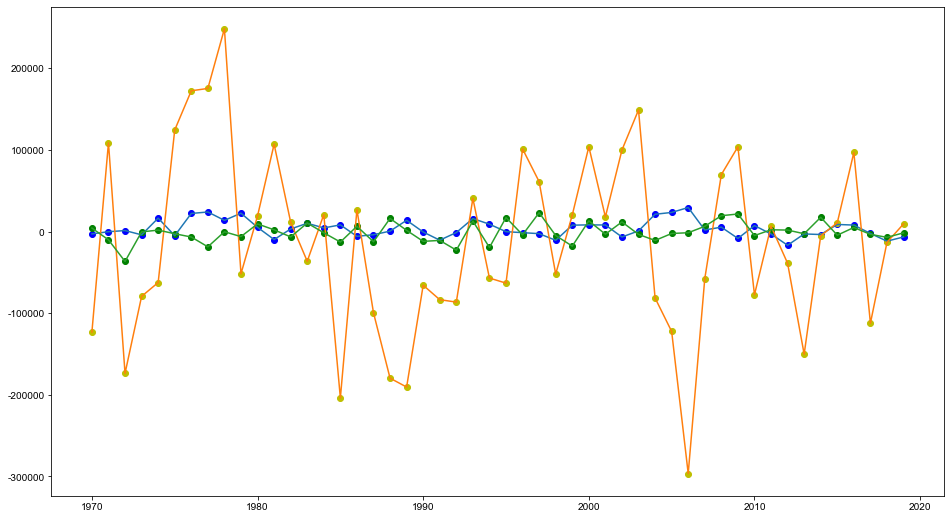

In [1444]:
plt.figure(figsize=(16,9))
plt.plot(info.年份,info.餐饮)
plt.scatter(info.年份,info.餐饮,c='b')
plt.plot(info.年份,info.房地产)
plt.scatter(info.年份,info.房地产,c='y')
plt.plot(info.年份,info.卫生)
plt.scatter(info.年份,info.卫生,c='g')

## 通过变异系数看项目总体稳定性

In [1445]:
stvalue = [info.房地产.mean()/info.房地产.std(),info.餐饮.mean()/info.餐饮.std(),info.卫生.mean()/info.卫生.std()]
stvalue

[-0.11891512569781547, 0.33673627437576564, -0.08448047832401342]

## 平均盈利能力

In [1446]:
mean_ = [info.房地产.mean()/info.房地产成本.mean()
         ,info.餐饮.mean()/info.餐饮成本.mean()
         ,info.卫生.mean()/info.卫生成本.mean()]
mean_

[-17.253089841629848, 71.08978009671127, -109.64609813258181]

## 计算盈利年份的概率

In [1447]:
P = [info.房地产[info.房地产>0].shape[0]/info.shape[0]
     ,info.餐饮[info.餐饮>0].shape[0]/info.shape[0]
     ,info.卫生[info.卫生>0].shape[0]/info.shape[0]]
P

[0.48, 0.54, 0.4]

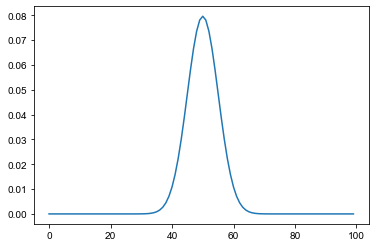

In [1448]:
plt.plot([bernoulliDistribution(100,i,0.5) for i in range(100)])

# 其他的代码例子

$ max \quad z = 2x_1+3x_2-5x_3 \\ \quad\\
s.t.\begin{cases}
x_1+x_2+x_3 =7\\
2x_1-5x_2+x_3>=10\\
x_1+3x_2+x_3<=12\\
x_1,x_2,x_3>=0\\
\end{cases} $

In [1449]:
c = np.array([2,3,-5])
A = np.array([[-2,5,-1],[1,3,1]])
b = np.array([-10,12])
Aeq = np.array([[1,1,1]])

beq = np.array([7])

In [1450]:
c

array([ 2,  3, -5])

## >=10 所以*-1求最小

In [1451]:
A

array([[-2,  5, -1],
       [ 1,  3,  1]])

In [1452]:
b

array([-10,  12])

In [1453]:
Aeq

array([[1, 1, 1]])

In [1454]:
res = optimize.linprog(-c,A,b,Aeq,beq)

In [1455]:
print(res)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -14.571428571428571
              x: [ 6.429e+00  5.714e-01  0.000e+00]
            nit: 3
          lower:  residual: [ 6.429e+00  5.714e-01  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  7.143e+00]
          upper:  residual: [       inf        inf        inf]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [-2.286e+00]
        ineqlin:  residual: [ 0.000e+00  3.857e+00]
                 marginals: [-1.429e-01 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


fun就是目标函数最小值，x就是最优解